In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

**Context**

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Можно построить матрицу корреляций для выявления наиболее коррелирующих признаков.
Определив наиболее коррелирующие величины можно в принципе говорить о поиске, возможно "важных", зависимостей.

In [3]:
correlation_matrix = df.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Так же можно построить тепловую карту (heatMap) для имеющихся признаков. Иногда такая визуальная составляющая может упростить поиск зависимостей для человека.

matplotlib.axes._subplots.AxesSubplot

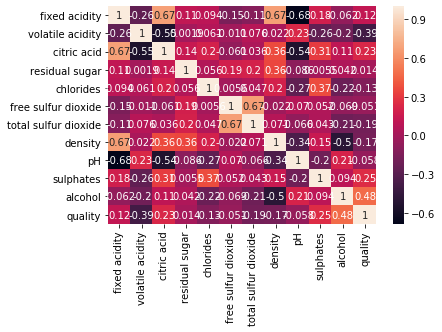

In [4]:
heatmap = sns.heatmap(correlation_matrix, annot=True)
type(heatmap)

Наиболее коррелирующее значение принадлежит показателям кислотности и рН вина. Как видно по графику, изменение
одной величины обратно пропорционально изменению другой. Это в принципе и так ясно исходя из значения коэффициента
корреляции.
# **r(pH, fixed acidity) = -0.682978**

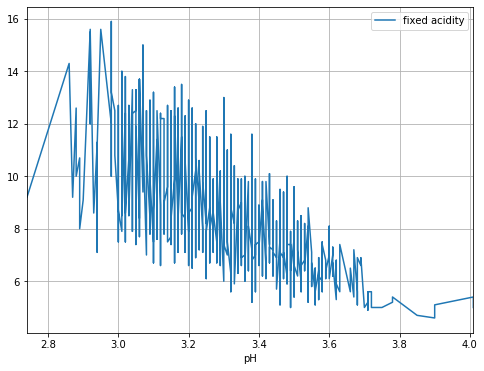

In [5]:
df[['pH','fixed acidity']].sort_values(by='pH').set_index('pH').plot(figsize=(8, 6), grid=True)

Проведем сравнение колличественных признаков относительно атрибутивного признака представленного в виде значения 
"КАЧЕСТВО".

In [6]:
df.set_index('quality').sort_index()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2
3,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9
3,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0
3,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8
3,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0
...,...,...,...,...,...,...,...,...,...,...,...
8,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
8,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0
8,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8


Наблюдает гистрограммы значений данной таблицы

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f565d70a690>,
      dtype=object)

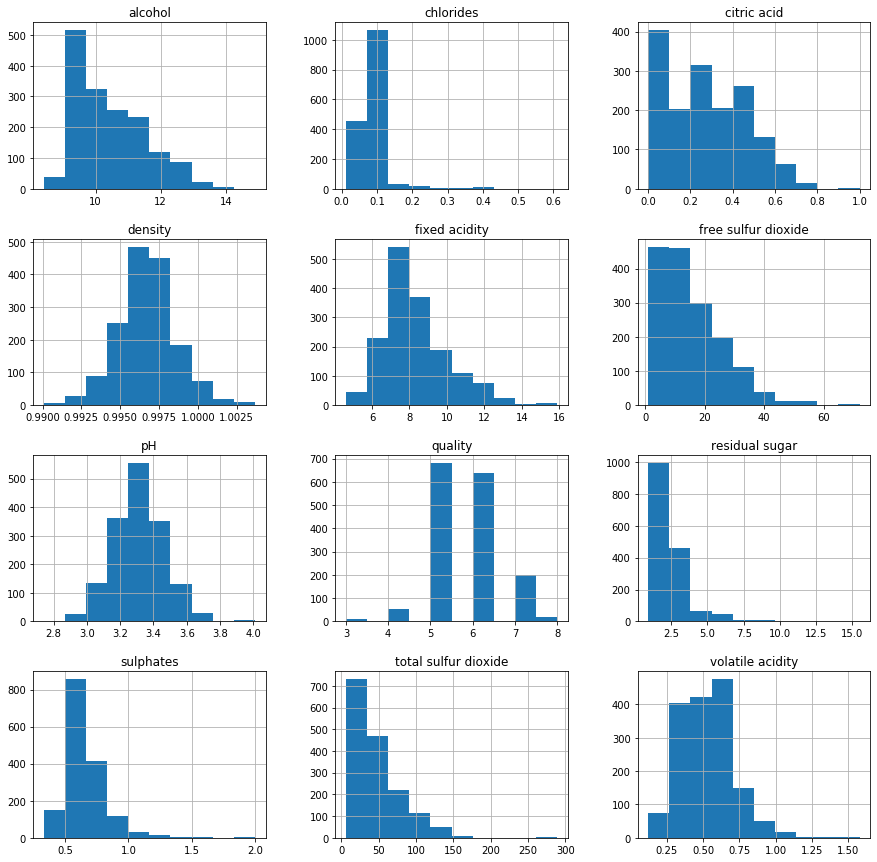

In [7]:
df.hist(figsize=(15, 15))

Характеристики распределений крепкости алкоголя в зависимости от признанного качества напитка.

In [8]:
listQA = []
print('='*40)
for rank in set(df['quality']):
    print(f'RANK:{rank}')
    print(df[df['quality']==rank]['alcohol'].describe())
    listQA.append([rank, df[df['quality']==rank]['alcohol'].mean()])
    print('='*40)
    
QA = pd.DataFrame(listQA)
if (QA.corr()[0][1]) >= 0.7:
    print('='*40)
    print('Correlation has a pretty big val')
    print('QA correlation:', QA.corr())
    print('='*40)
QA = QA.rename(columns={0:'quality', 1:'alcohol'}).set_index('quality')

RANK:3
count    10.000000
mean      9.955000
std       0.818009
min       8.400000
25%       9.725000
50%       9.925000
75%      10.575000
max      11.000000
Name: alcohol, dtype: float64
RANK:4
count    53.000000
mean     10.265094
std       0.934776
min       9.000000
25%       9.600000
50%      10.000000
75%      11.000000
max      13.100000
Name: alcohol, dtype: float64
RANK:5
count    681.000000
mean       9.899706
std        0.736521
min        8.500000
25%        9.400000
50%        9.700000
75%       10.200000
max       14.900000
Name: alcohol, dtype: float64
RANK:6
count    638.000000
mean      10.629519
std        1.049639
min        8.400000
25%        9.800000
50%       10.500000
75%       11.300000
max       14.000000
Name: alcohol, dtype: float64
RANK:7
count    199.000000
mean      11.465913
std        0.961933
min        9.200000
25%       10.800000
50%       11.500000
75%       12.100000
max       14.000000
Name: alcohol, dtype: float64
RANK:8
count    18.000000
mean 

План парного регрезионного анализа.
1. 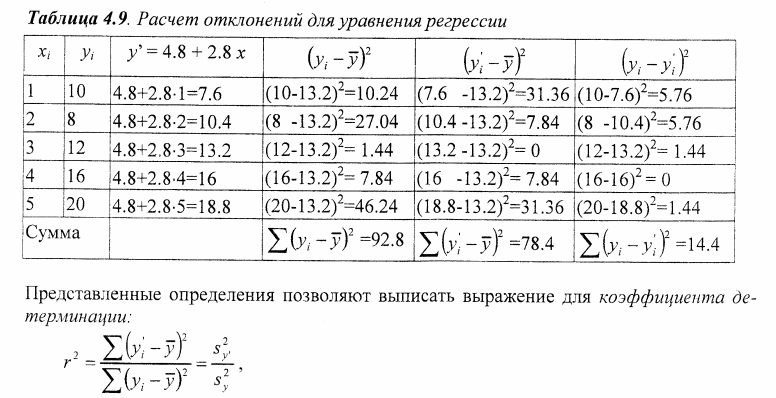

[[1.         0.82347165]
 [0.82347165 1.        ]]
Slope: 0.43
Intercept: 8.36


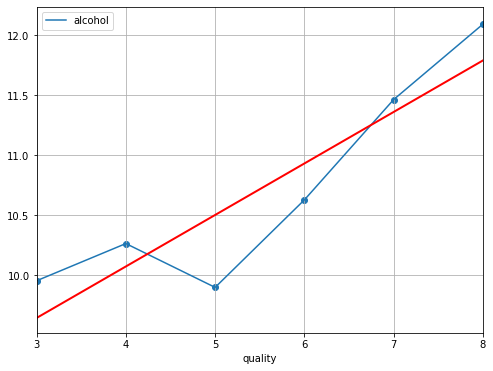

In [9]:
x = [listQA[i][0] for i in range(len(listQA))]
y = [listQA[i][1] for i in range(len(listQA))]

print(np.corrcoef(x,y)**2) #!!!!!
x = np.array(x).reshape((-1,1))
y = np.array(y)

slr = LinearRegression()
slr.fit(x, y)

y_pred = slr.predict(x)

print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

# VISUALISATION
QA.plot(figsize=(8, 6), grid=True)
plt.scatter(x, y)
plt.plot(x, slr.predict(x), color='red', linewidth=2)

Уавнение прямой регрессии: $alcohol = 0.43*quality + 8.36$

Вывод: Более крепкое вино зачастую получается большую оценку качества чем аналоги с меньшей крепкостью. 

In [46]:
a = 0.43
b = 8.36

Расположение отклонений истинных значений от предсказанных. Судя по данному графику можно положить что данная зависимость может подвергаться линейному регрессионному анализу

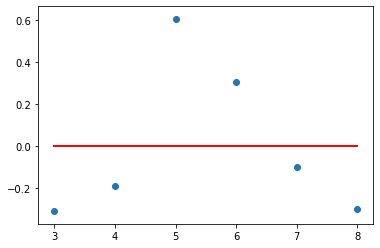

In [50]:
plt.plot(figsize=(8, 6), grid=True)
plt.scatter(x,[(y_pred[i]-y[i]) for i in range(len(x))])
plt.plot(x,[0,0,0,0,0,0],color='red', linewidth=2)

Коэффициент детерминации

In [26]:
df = pd.DataFrame(y,columns=['y'])
df['y_pred'] = y_pred
df

,y,y_pred
0,9.955000,9.644744
1,10.265094,10.074159
2,9.899706,10.503573
3,10.629519,10.932987
4,11.465913,11.362401
5,12.094444,11.791815


In [29]:
from sklearn.metrics import r2_score
print('R^2 (coefficient of determination):', round(r2_score(y, y_pred),3))

R^2 (coefficient of determination): 0.823


In [45]:
n = 6
Se = 1/n * sum([ (y[i]-y_pred[i])**2 for i in range(n)])
print(f"Se = {round(Se,3)}")

Ser_a = Se / (n-2)**0.5
print(f"Ser_a = {round(Ser_a,4)}")

xavg = sum(x)/len(x)
Sx = 1/n * sum([(x[i] - xavg)**2 for i in range(n)])
Ser_b = Ser_a / Sx
print(f"Ser_b = {round(Ser_b[0], 4)}")

Se = 0.115
Ser_a = 0.0576
Ser_b = 0.0198


2. Проверить поулченные коэффициенты на значимость

На основании имеющихся наблюдений построена зависимость оценки качества акоголя от его крепкости. В дейсвтительности зависимым параметром выбрано качесто, но в целом сути дела это не меняет и зависимость описывается следующим уравнением прямой.

# $y' = 0.43\cdot x + 8.36$

Ser(a) = 0.0576

Ser(b) = 0.0198

Проверим гипотезы о значимости коэффициентов на уровне значимости 5%:

1) Формулировка гипотез:

    H0: a = 0; H1: a != 0;
    H0: b = 0; H1: b != 0;

2) Критические значения для распределения Стьюдента с n-2 = 4 степенями свободы равны ta/2 = 2.77645. Следовательно, критическая область |t| > 2.77645

3) Определяем расчетные значения критерия t(b)

In [48]:
tb = b/Ser_b
print(tb[0])
ta = a/Ser_a 
print(ta)

422.97823464476386
7.459219722375194


4) Принятие решения. 

Расчетные значения критерия для обоих коэффициентов превышают критическое значение:

t(b)> ta/2, 423 > 2.776;

t(a)> ta/2, 7.5 > 2,776;

-> основные гипотезы отклоняются

5) Вьвод.
Оба коэффициентарегрессионной модели значимо (не случайно) отличаются
от нуля.